# Seoul bike Sharing Demand

## Preparation

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import calplot
import calendar

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')
sns.set_palette('Dark2')
my_color = sns.color_palette('Dark2')

## Data

In [2]:
# Read data
raw_data_df = pd.read_csv('../data/SeoulbikeData.csv')

In [3]:
# Display the number or rows and columns
print(f'Total Rows: {len(raw_data_df)}')
print(f'Total Columns: {len(raw_data_df.columns)}')

Total Rows: 8760
Total Columns: 14


In [4]:
# Show the first 5 rows of data
raw_data_df.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01-12-17                254     0            -5.2           37   
1  01-12-17                204     1            -5.5           38   
2  01-12-17                173     2            -6.0           39   
3  01-12-17                107     3            -6.2           40   
4  01-12-17                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Show the data information
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [6]:
# Summary statistics of numerical columns
raw_data_df.describe().T

count         mean         std   min     25%  \
Rented Bike Count         8760.0   704.602055  644.997468   0.0  191.00   
Hour                      8760.0    11.500000    6.922582   0.0    5.75   
Temperature(C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)               8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)          8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)          8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)   8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)              8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)             8760.0     0.075068    0.436746   0.0    0.00   

                              50%      75%      max  
Rented Bike Count          504.50  1065.25  3556.00  
Hour                        11.50    17.25    23.00  
Temperature(C)              13.70    22.50    39.40  
Humidity(%)                 57.00    74.00    98.00  
Wind speed (m/s)             1.50     2.30     7.40  
Visibility (10m)          1698.00  2000.00  2000.00  
Dew point temperature(C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)      0.01     0.93     3.52  
Rainfall(mm)                 0.00     0.00    35.00  
Snowfall (cm)                0.00     0.00     8.80

## Data Cleaning and Preparation

In [7]:
# Make a copy from the DataFrame
bike_rent_df = raw_data_df.copy()

In [8]:
# Renaming columns
bike_rent_df.columns = ['date', 'rented_bike_count', 'hour',
                         'temperature_c', 'humidity_%','wind_speed_m/s', 'visibility_10m', 'dew_point_temperature_c','solar_radiation_MJ/m2', 'rainfall_mm', 'snowfall_cm', 'seasons','is_holiday', 'is_functioning_day']

bike_rent_df.head()

date  rented_bike_count  hour  temperature_c  humidity_%  \
0  01-12-17                254     0           -5.2          37   
1  01-12-17                204     1           -5.5          38   
2  01-12-17                173     2           -6.0          39   
3  01-12-17                107     3           -6.2          40   
4  01-12-17                 78     4           -6.0          36   

   wind_speed_m/s  visibility_10m  dew_point_temperature_c  \
0             2.2            2000                    -17.6   
1             0.8            2000                    -17.6   
2             1.0            2000                    -17.7   
3             0.9            2000                    -17.6   
4             2.3            2000                    -18.6   

   solar_radiation_MJ/m2  rainfall_mm  snowfall_cm seasons  is_holiday  \
0                    0.0          0.0          0.0  Winter  No Holiday   
1                    0.0          0.0          0.0  Winter  No Holiday   
2                    0.0          0.0          0.0  Winter  No Holiday   
3                    0.0          0.0          0.0  Winter  No Holiday   
4                    0.0          0.0          0.0  Winter  No Holiday   

  is_functioning_day  
0                Yes  
1                Yes  
2                Yes  
3                Yes  
4                Yes

In [9]:
bike_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     8760 non-null   object 
 1   rented_bike_count        8760 non-null   int64  
 2   hour                     8760 non-null   int64  
 3   temperature_c            8760 non-null   float64
 4   humidity_%               8760 non-null   int64  
 5   wind_speed_m/s           8760 non-null   float64
 6   visibility_10m           8760 non-null   int64  
 7   dew_point_temperature_c  8760 non-null   float64
 8   solar_radiation_MJ/m2    8760 non-null   float64
 9   rainfall_mm              8760 non-null   float64
 10  snowfall_cm              8760 non-null   float64
 11  seasons                  8760 non-null   object 
 12  is_holiday               8760 non-null   object 
 13  is_functioning_day       8760 non-null   object 
dtypes: float64(6), int64(4),

In [10]:
# Change Date data type to datetime using pd.to_datetime()
bike_rent_df['date'] = pd.to_datetime(
    bike_rent_df['date'], format='%d-%m-%y')

In [11]:
bike_rent_df.head()

date  rented_bike_count  hour  temperature_c  humidity_%  \
0 2017-12-01                254     0           -5.2          37   
1 2017-12-01                204     1           -5.5          38   
2 2017-12-01                173     2           -6.0          39   
3 2017-12-01                107     3           -6.2          40   
4 2017-12-01                 78     4           -6.0          36   

   wind_speed_m/s  visibility_10m  dew_point_temperature_c  \
0             2.2            2000                    -17.6   
1             0.8            2000                    -17.6   
2             1.0            2000                    -17.7   
3             0.9            2000                    -17.6   
4             2.3            2000                    -18.6   

   solar_radiation_MJ/m2  rainfall_mm  snowfall_cm seasons  is_holiday  \
0                    0.0          0.0          0.0  Winter  No Holiday   
1                    0.0          0.0          0.0  Winter  No Holiday   
2                    0.0          0.0          0.0  Winter  No Holiday   
3                    0.0          0.0          0.0  Winter  No Holiday   
4                    0.0          0.0          0.0  Winter  No Holiday   

  is_functioning_day  
0                Yes  
1                Yes  
2                Yes  
3                Yes  
4                Yes

In [12]:
# Date range
bike_share_date = bike_rent_df['date'].dt.date

print(f"Date column ranging from {min(bike_share_date)} \
    to {max(bike_share_date)}")

Date column ranging from 2017-12-01     to 2018-11-30


In [13]:
# Check for duplicates
duplicated_records = sum(bike_rent_df.duplicated())
print(f'Duplicated records in the data: {duplicated_records} record(s)')

Duplicated records in the data: 0 record(s)


In [14]:
# Checking for the data with non functional days
bike_rent_df.query("is_functioning_day == 'No'")

bike_rent_df['is_functioning_day'].value_counts(normalize=True)*100

is_functioning_day
Yes    96.63242
No      3.36758
Name: proportion, dtype: float64

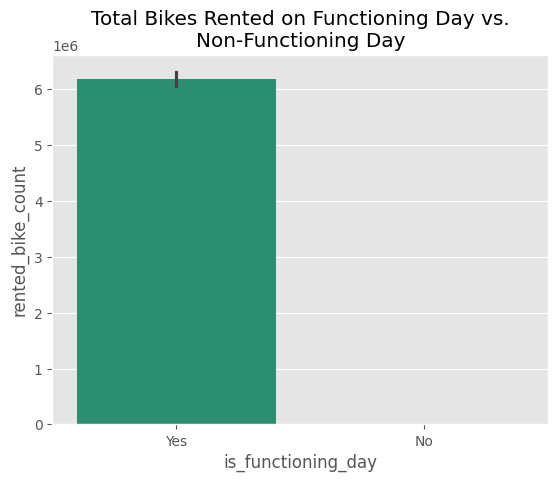

In [15]:
sns.barplot(
    data=bike_rent_df,
    x='is_functioning_day',
    y='rented_bike_count',
    estimator='sum'
)
plt.title('Total Bikes Rented on Functioning Day vs.\nNon-Functioning Day')
plt.show()

In [16]:
# Filter for functioning days only
bike_rent_df = bike_rent_df.query("is_functioning_day == 'Yes'").copy()

In [17]:
# Dropping the is_functioning_day column
bike_rent_df.drop('is_functioning_day', axis=1, inplace=True)

In [18]:
# Information from the final data
bike_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     8465 non-null   datetime64[ns]
 1   rented_bike_count        8465 non-null   int64         
 2   hour                     8465 non-null   int64         
 3   temperature_c            8465 non-null   float64       
 4   humidity_%               8465 non-null   int64         
 5   wind_speed_m/s           8465 non-null   float64       
 6   visibility_10m           8465 non-null   int64         
 7   dew_point_temperature_c  8465 non-null   float64       
 8   solar_radiation_MJ/m2    8465 non-null   float64       
 9   rainfall_mm              8465 non-null   float64       
 10  snowfall_cm              8465 non-null   float64       
 11  seasons                  8465 non-null   object        
 12  is_holiday               8465 non-null 

In [19]:
bike_rent_df.head()

date  rented_bike_count  hour  temperature_c  humidity_%  \
0 2017-12-01                254     0           -5.2          37   
1 2017-12-01                204     1           -5.5          38   
2 2017-12-01                173     2           -6.0          39   
3 2017-12-01                107     3           -6.2          40   
4 2017-12-01                 78     4           -6.0          36   

   wind_speed_m/s  visibility_10m  dew_point_temperature_c  \
0             2.2            2000                    -17.6   
1             0.8            2000                    -17.6   
2             1.0            2000                    -17.7   
3             0.9            2000                    -17.6   
4             2.3            2000                    -18.6   

   solar_radiation_MJ/m2  rainfall_mm  snowfall_cm seasons  is_holiday  
0                    0.0          0.0          0.0  Winter  No Holiday  
1                    0.0          0.0          0.0  Winter  No Holiday  
2                    0.0          0.0          0.0  Winter  No Holiday  
3                    0.0          0.0          0.0  Winter  No Holiday  
4                    0.0          0.0          0.0  Winter  No Holiday

In [20]:
# Add information about time of day for each records
bike_rent_df['time_of_day'] = np.where(
    bike_rent_df['hour'] <= 12, 'Morning',
    np.where(bike_rent_df['hour'] <= 18,
             'Afternoon', 'Evening'))

In [21]:
# Add information about the day of week each for each records
bike_rent_df['day_of_week'] = bike_rent_df['date'].dt.day_name()

day_categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                  'Friday','Saturday', 'Sunday']


# Convert the day of week as categorical and sort the value
bike_rent_df['day_of_week'] = bike_rent_df['day_of_week'].astype('category')
bike_rent_df['day_of_week'] = bike_rent_df['day_of_week'].cat.set_categories(
    day_categories, ordered=True
)

In [22]:
# Add information about the week type for each records
bike_rent_df['week_type'] = np.where(
    bike_rent_df['day_of_week'].isin(['Saturday', 'Sunday']),
    'Weekend', 'Weekday')

In [23]:
bike_rent_df.head()

date  rented_bike_count  hour  temperature_c  humidity_%  \
0 2017-12-01                254     0           -5.2          37   
1 2017-12-01                204     1           -5.5          38   
2 2017-12-01                173     2           -6.0          39   
3 2017-12-01                107     3           -6.2          40   
4 2017-12-01                 78     4           -6.0          36   

   wind_speed_m/s  visibility_10m  dew_point_temperature_c  \
0             2.2            2000                    -17.6   
1             0.8            2000                    -17.6   
2             1.0            2000                    -17.7   
3             0.9            2000                    -17.6   
4             2.3            2000                    -18.6   

   solar_radiation_MJ/m2  rainfall_mm  snowfall_cm seasons  is_holiday  \
0                    0.0          0.0          0.0  Winter  No Holiday   
1                    0.0          0.0          0.0  Winter  No Holiday   
2                    0.0          0.0          0.0  Winter  No Holiday   
3                    0.0          0.0          0.0  Winter  No Holiday   
4                    0.0          0.0          0.0  Winter  No Holiday   

  time_of_day day_of_week week_type  
0     Morning      Friday   Weekday  
1     Morning      Friday   Weekday  
2     Morning      Friday   Weekday  
3     Morning      Friday   Weekday  
4     Morning      Friday   Weekday

In [24]:
# Export cleaned data
bike_rent_df.to_csv(
    '../data/SeoulBikeRentCleaned.csv',
    index=False
)

## Data Exploration

In [25]:
bike_rent_df.describe().T

count                           mean  \
date                       8465  2018-05-28 09:14:23.744831744   
rented_bike_count        8465.0                     729.156999   
hour                     8465.0                      11.507029   
temperature_c            8465.0                      12.771057   
humidity_%               8465.0                      58.147194   
wind_speed_m/s           8465.0                       1.725883   
visibility_10m           8465.0                    1433.873479   
dew_point_temperature_c  8465.0                       3.944997   
solar_radiation_MJ/m2    8465.0                       0.567868   
rainfall_mm              8465.0                        0.14912   
snowfall_cm              8465.0                       0.077685   

                                         min                  25%  \
date                     2017-12-01 00:00:00  2018-02-27 00:00:00   
rented_bike_count                        2.0                214.0   
hour                                     0.0                  6.0   
temperature_c                          -17.8                  3.0   
humidity_%                               0.0                 42.0   
wind_speed_m/s                           0.0                  0.9   
visibility_10m                          27.0                935.0   
dew_point_temperature_c                -30.6                 -5.1   
solar_radiation_MJ/m2                    0.0                  0.0   
rainfall_mm                              0.0                  0.0   
snowfall_cm                              0.0                  0.0   

                                         50%                  75%  \
date                     2018-05-28 00:00:00  2018-08-24 00:00:00   
rented_bike_count                      542.0               1084.0   
hour                                    12.0                 18.0   
temperature_c                           13.5                 22.7   
humidity_%                              57.0                 74.0   
wind_speed_m/s                           1.5                  2.3   
visibility_10m                        1690.0               2000.0   
dew_point_temperature_c                  4.7                 15.2   
solar_radiation_MJ/m2                   0.01                 0.93   
rainfall_mm                              0.0                  0.0   
snowfall_cm                              0.0                  0.0   

                                         max         std  
date                     2018-11-30 00:00:00         NaN  
rented_bike_count                     3556.0  642.351166  
hour                                    23.0    6.920899  
temperature_c                           39.4   12.104375  
humidity_%                              98.0   20.484839  
wind_speed_m/s                           7.4    1.034281  
visibility_10m                        2000.0  609.051229  
dew_point_temperature_c                 27.2   13.242399  
solar_radiation_MJ/m2                   3.52    0.868245  
rainfall_mm                             35.0     1.12554  
snowfall_cm                              8.8    0.444063

### Univariate Analysis

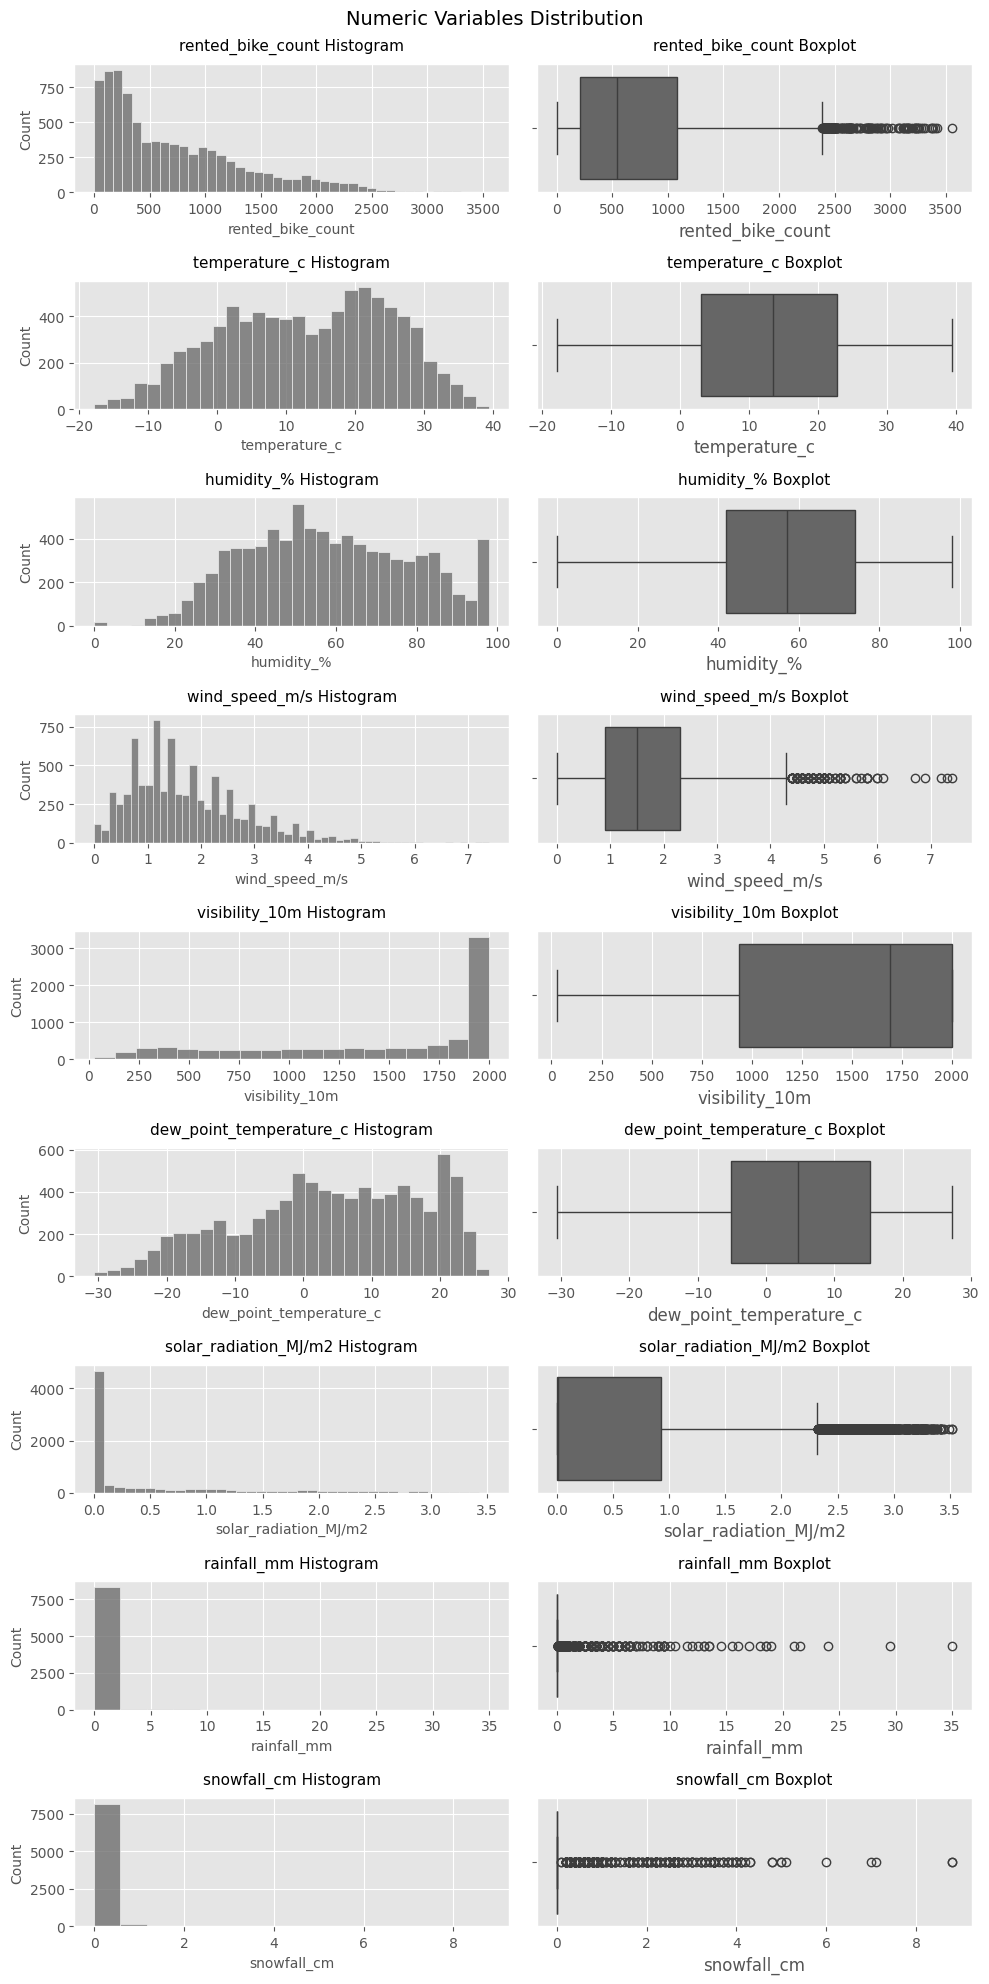

In [26]:
data = bike_rent_df.drop('hour', axis=1)

numeric_columns = data.select_dtypes(include='number').columns.tolist()

fig, ax = plt.subplots(ncols=2,
                       nrows=len(numeric_columns),
                       figsize=(10, 20))

for index, column in enumerate(numeric_columns):
        axes_left = ax[index, 0]
        axes_right = ax[index, 1]

        # Histogram distribution plot
        sns.histplot(data=data,
                     x=column,
                     ax=axes_left,
                     color=my_color[-1])

        axes_left.set_title(f'{column} Histogram',
                            fontsize=11, pad=10)
        axes_left.set_xlabel(column, fontsize=10)
        axes_left.set_ylabel('Count', fontsize=10)

        # Boxplot distribution plot
        sns.boxplot(data=data,
                     x=column,
                     ax=axes_right,
                     color=my_color[-1])

        axes_right.set_title(f'{column} Boxplot',
                            fontsize=11, pad=10)

        axes_left.set_xlabel(column, fontsize=10)
        axes_left.set_ylabel('Count', fontsize=10)

fig.suptitle('Numeric Variables Distribution',
             fontsize=14, y=0.99)

plt.tight_layout()
plt.show()

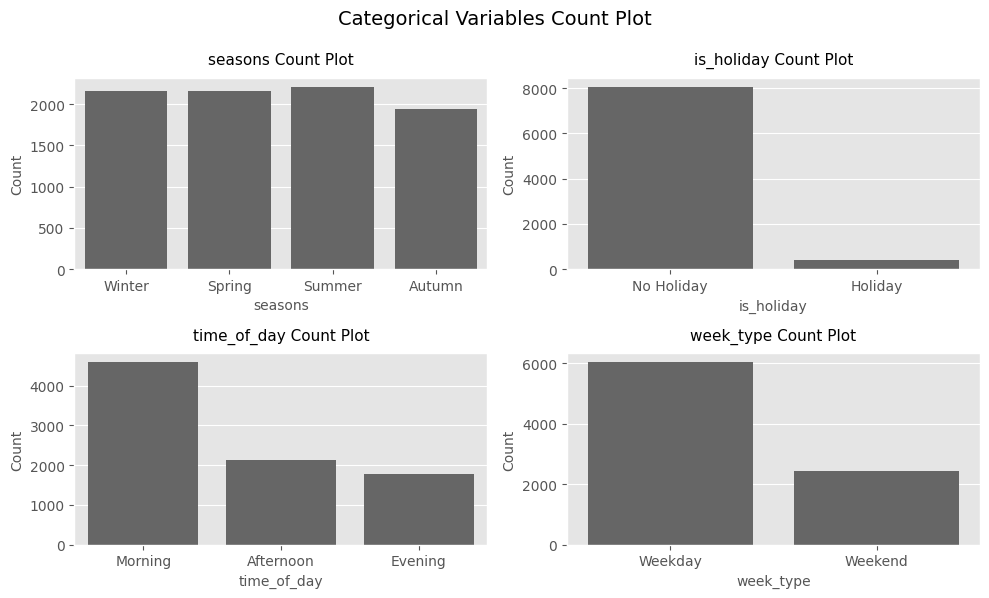

In [27]:
categorical_columns = bike_rent_df.select_dtypes(include='object').columns.tolist()
column_index = 0

rows = len(categorical_columns) // 2
cols = 2

fig, ax = plt.subplots(ncols=cols,
                       nrows=rows,
                       figsize=(10, 6))
for row in range(rows):
    for col in range(cols):
        if column_index < len(categorical_columns):

            axes = ax[row, col]
            column = categorical_columns[column_index]

            # Histogram distribution plot
            sns.countplot(data=bike_rent_df,
                         x=column,
                         ax=axes,
                         color=my_color[-1])

            axes.set_title(f'{column} Count Plot',
                                fontsize=11, pad=10)
            axes.set_xlabel(column, fontsize=10)
            axes.set_ylabel('Count', fontsize=10)

            column_index += 1

        else:
            break

fig.suptitle('Categorical Variables Count Plot',
             fontsize=14, y=0.99)

plt.tight_layout()
plt.show()

### Bivariate Analysis

We can use seaborn `sns.pairplot()` function to show the relationship between all numerical variables in the data.

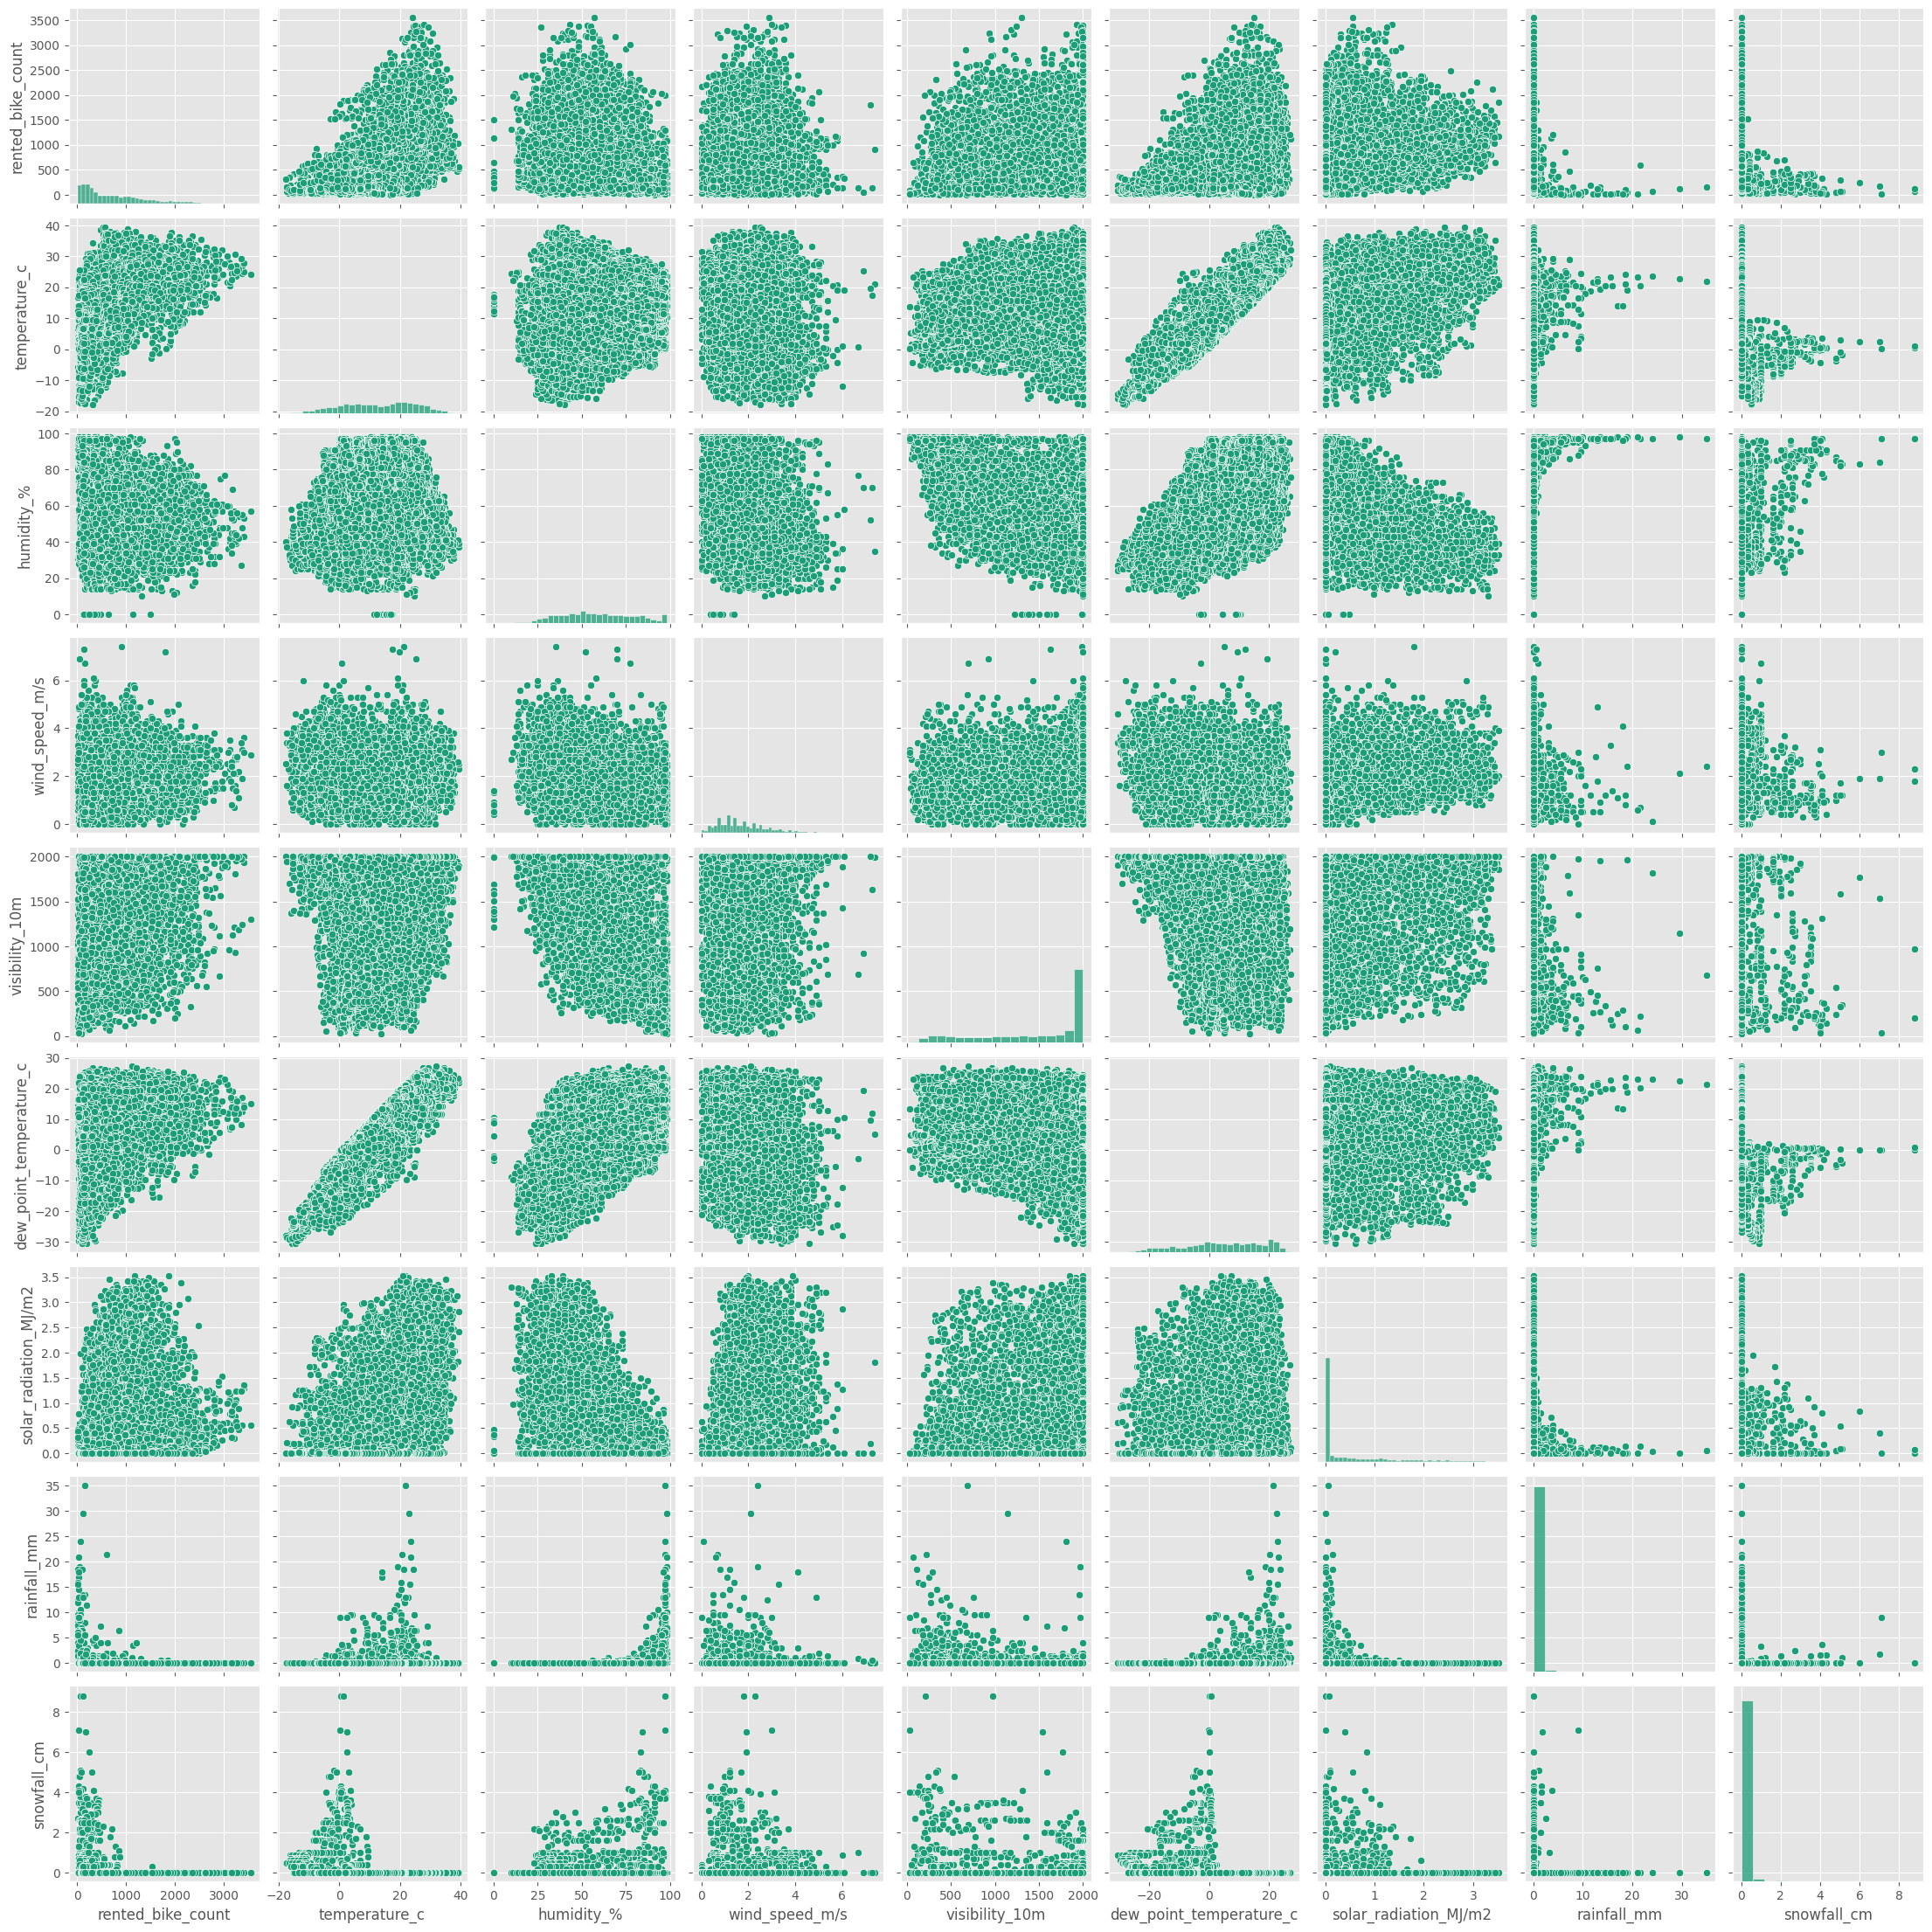

In [28]:
sns.pairplot(
    bike_rent_df.drop('hour', axis=1)
)

plt.show()

There are too many plots and the result is a little hard to see. Because we only interested on what variables affected the number of Bikes Rented, we will transform the result to as follow.

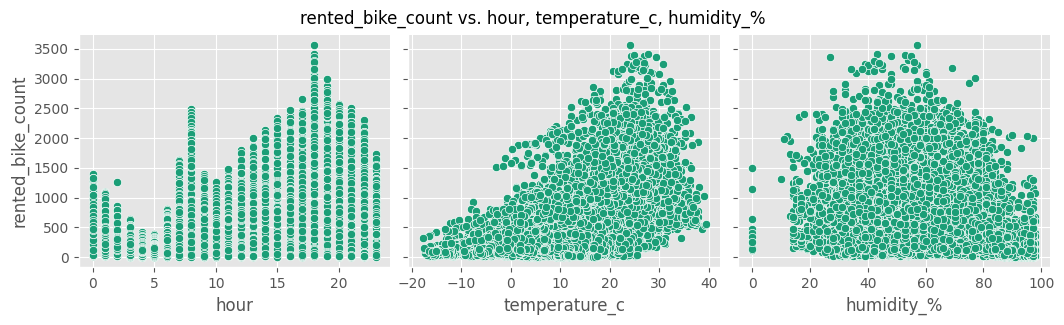

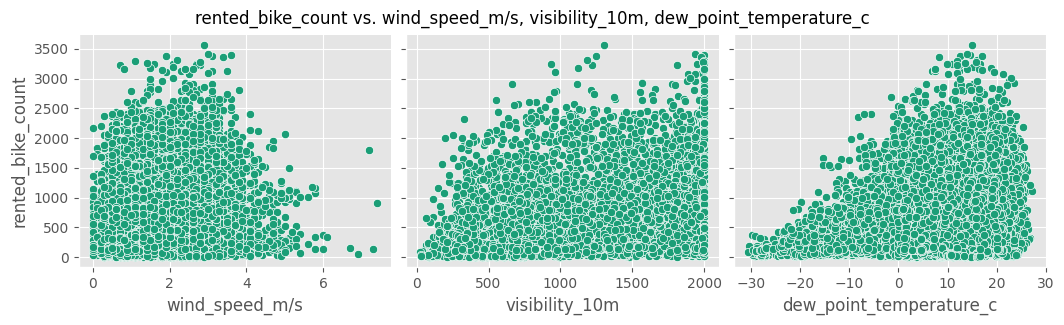

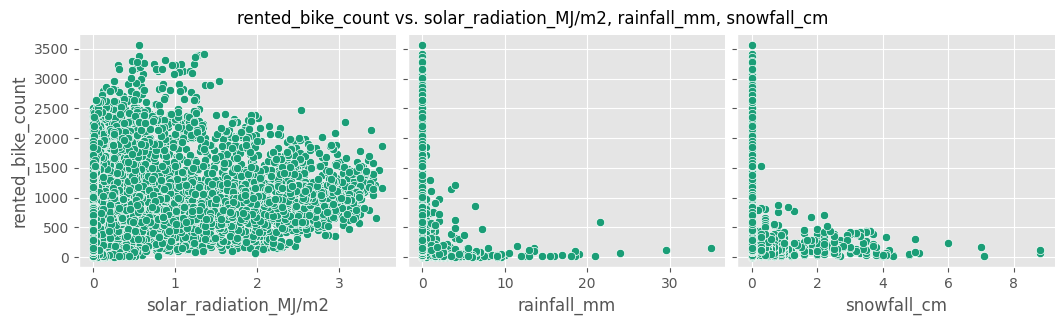

In [29]:
pairplot_data = bike_rent_df.drop('rented_bike_count', axis=1)
numeric_columns = pairplot_data.select_dtypes(include='number').columns.tolist()

while numeric_columns:
    g = sns.pairplot(
            data=bike_rent_df,
            y_vars='rented_bike_count',
            x_vars=numeric_columns[:3],
            height=3,
            aspect=1.2
        )
    variables = ', '.join(numeric_columns[:3])
    g.fig.suptitle(f'rented_bike_count vs. {variables}', y=1.05)
    plt.show()
    del numeric_columns[:3]

plt.show()

From the plot above, we can see that:

- There's a time of the day when a high number of rents occurred, which is at 08.00 and 18.00.
- Temperature and dew point temperature have a positive relationship with the number of Bikes Renteded, with higher rent taking place at higher temperatures.
- Little to no rain or snowfall is preferred by the users to rent bikes.

Later, we will look at the correlation between each variable and what variables are the most correlated with the bike rent. The weather conditions in Seoul, which can be seen from the variables distribution before, should be accounted for to determine that variables.

## Analysis

Let's first look at the Bikes Renteded in number.

In [30]:
# Overview of the total bike rented, daily average, median, and the most bike rented in a day
bike_rent_grouped = bike_rent_df.groupby(['date'], as_index=False)
daily_rent_df = bike_rent_grouped.agg({'rented_bike_count': 'sum',
                                       'temperature_c':'mean'})

total_bike_rented = daily_rent_df['rented_bike_count'].sum()
daily_rent_avg = daily_rent_df['rented_bike_count'].mean()
daily_rent_median = np.median(daily_rent_df['rented_bike_count'])
daily_rent_max = daily_rent_df['rented_bike_count'].max()

hourly_rent_avg = bike_rent_df['rented_bike_count'].mean()
hourly_rent_median = np.median(bike_rent_df['rented_bike_count'])
hourly_rent_max = bike_rent_df['rented_bike_count'].max()

print(f"=== Daily data ===\nTotal bike rented: {total_bike_rented:,}")
print(f"bike rented per day (average): {daily_rent_avg:,.0f}")
print(f"bike rented per day (median): {daily_rent_median:,.0f}")
print(f"Max bike rented per day: {daily_rent_max:,.0f}\n")

print(f"=== Hourly data ===")
print(f"bike rented per hour (average): {hourly_rent_avg:,.0f}")
print(f"bike rented per hour (median): {hourly_rent_median:,.0f}")
print(f"Max bike rented per hour: {hourly_rent_max:,.0f}")

=== Daily data ===
Total bike rented: 6,172,314
bike rented per day (average): 17,485
bike rented per day (median): 18,563
Max bike rented per day: 36,149

=== Hourly data ===
bike rented per hour (average): 729
bike rented per hour (median): 542
Max bike rented per hour: 3,556


Using `calplot` libraries, we can plot the number of daily Bikes Renteded from our data. We can see that from May - June, there are positive trends in the number of Bikes Renteded and declined after that.

In [31]:
# Get additional data from the main DataFrame to fill the daily rent data
column_list = ['date', 'seasons', 'day_of_week', 'week_type']
right_df = bike_rent_df.drop_duplicates(subset=['date'])[column_list]

daily_rent_df = daily_rent_df.merge(right_df, how='left', on='date')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


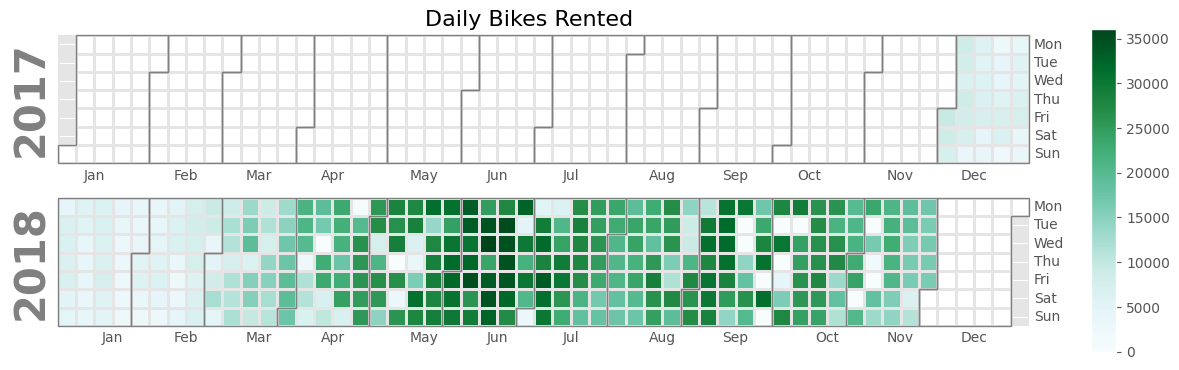

In [32]:
# Creating a calendar plot to show the number of bike rented each day
daily_rent_series = daily_rent_df.set_index('date')['rented_bike_count'].squeeze()

calplot.calplot(daily_rent_series, cmap='BuGn',
                colorbar=True,
                fillcolor='white')

plt.suptitle('Daily Bikes Rented', y=1.03, x=0.4, fontsize=16)
plt.show()

We can also use a line plot to view the trends. The extreme dips on the figure below could indicate it was raining at that day.

To better see the trends, looking at the data by the number of Bikes Renteded in a 7-day moving average is probably the best.

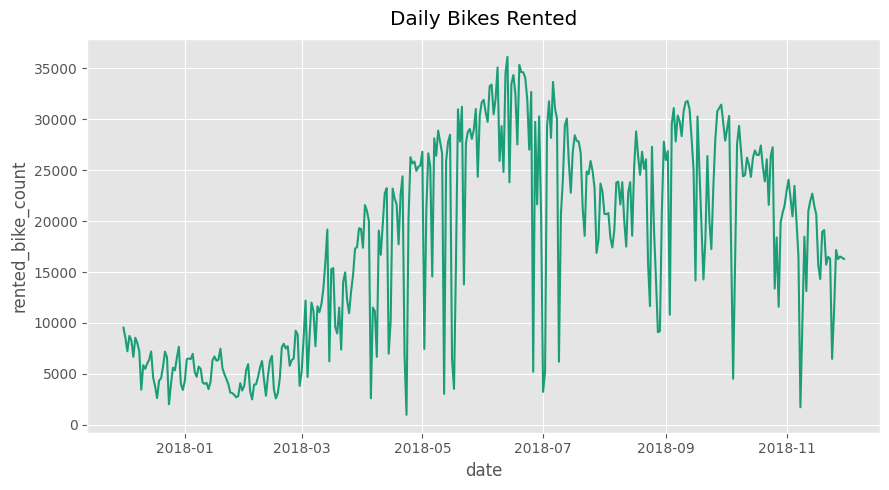

In [33]:
# Plot the number of bike rented each day
plt.figure(figsize=(9, 5))
sns.lineplot(x='date',
            y='rented_bike_count',
            data=daily_rent_df)

plt.title('Daily Bikes Rented', pad=10)

plt.tight_layout()
plt.show()

In [34]:
# Calculate the 7-days moving average of daily bike rent
daily_rent_df['bike_rent_moving_avg'] = daily_rent_df['rented_bike_count'] \
    .rolling(7).mean()

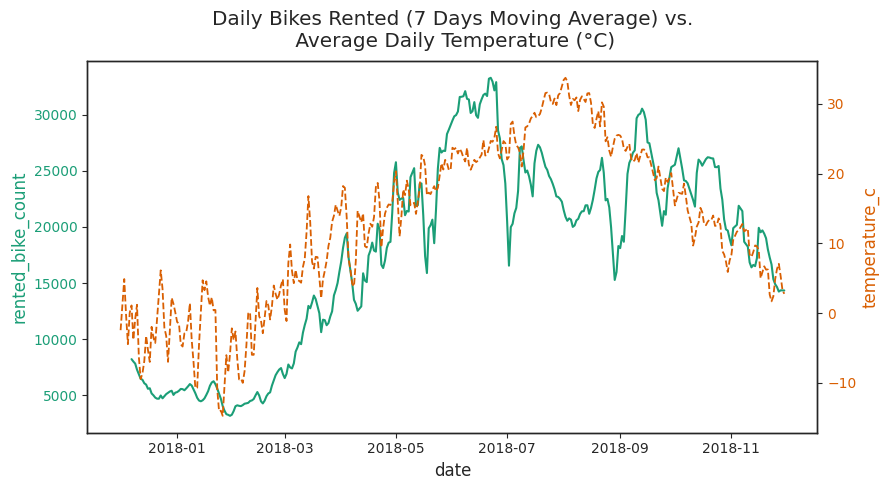

In [35]:
# Plot the 7-days moving average of Bikes Renteded each day
plt.figure(figsize=(9, 5))

with sns.axes_style('ticks'):
    ax1 = sns.lineplot(
        x='date',
        y='bike_rent_moving_avg',
        data=daily_rent_df)

    ax1.tick_params(axis='y', labelcolor=my_color[0])
    ax1.set_ylabel('rented_bike_count', color=my_color[0])

    ax2 = ax1.twinx()

    ax2 = sns.lineplot(
        x='date',
        y='temperature_c',
        data=daily_rent_df,
        color=my_color[1],
        ls='--', lw=1.3)

    ax2.tick_params(axis='y', labelcolor=my_color[1])
    ax2.set_ylabel('temperature_c', color=my_color[1])

plt.title(
    'Daily Bikes Rented (7 Days Moving Average) vs.\n Average Daily Temperature (°C)',
    pad=10)

plt.tight_layout()
plt.show()

The number of Bikes Rented per day is low in the winter and started to have positive trends from spring until summer. It looks like the number of Bikes Renteded correlated with the temperature of the day.

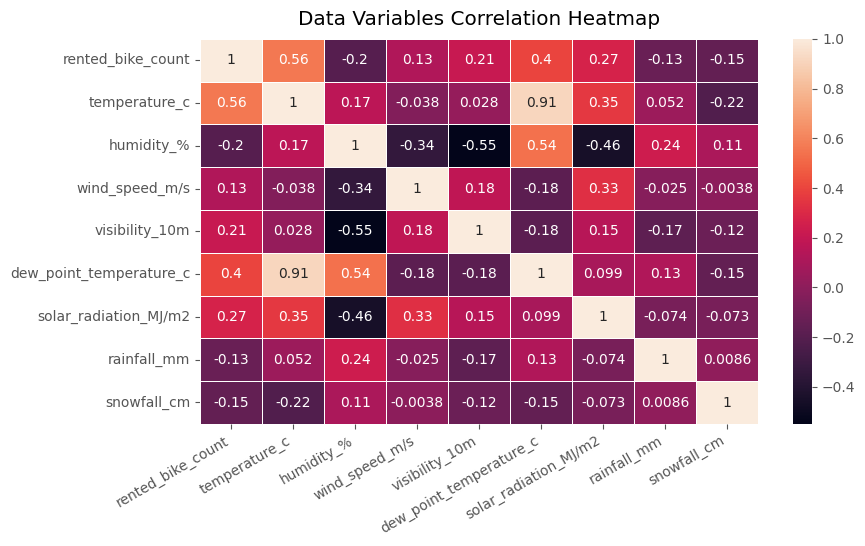

In [36]:
fig, ax = plt.subplots(figsize=(9, 5))

heatmap_data = bike_rent_df.drop('hour', axis=1)

ax = sns.heatmap(
    heatmap_data.corr(numeric_only=True),
    annot=True,
    linewidth=.5
)

ax.set_title(
    'Data Variables Correlation Heatmap',
    pad=10
)

ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

From the heat map, we can infer the following:

- Temperature is the variable that correlates the most with the number of Bikes Renteded per hour, followed by dew point temperature.
- Temperature and dew point temperature have the highest correlation coefficient at 0.91.
- Humidity and dew point temperature are moderately correlated with a 0.54 coefficient.
- Visibility and solar radiation have a negative correlation with humidity, at -0.55 and -0.46. This is because higher humidity could lead to the formation of fog (https://education.nationalgeographic.org/resource/fog/).

Let's look at how each variables affected the number of Bikes Renteded.

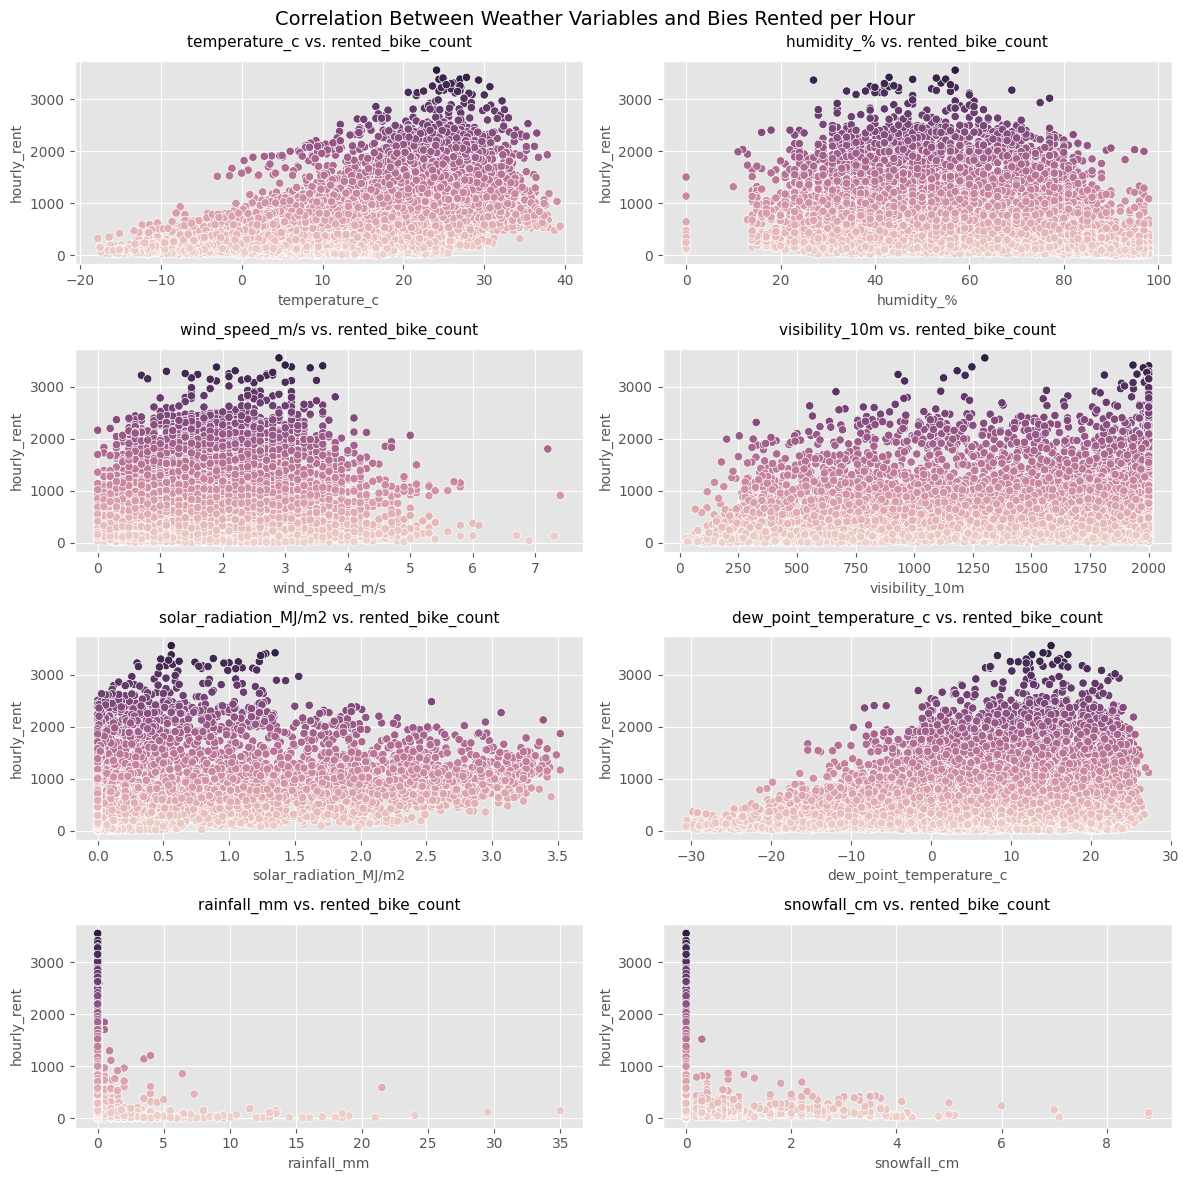

In [37]:
column_list = ['temperature_c', 'humidity_%', 'wind_speed_m/s',
               'visibility_10m', 'solar_radiation_MJ/m2',
               'dew_point_temperature_c', 'rainfall_mm',
               'snowfall_cm']

column_list_index = 0

cols = 2
rows = 4

hourly_rent_avg = bike_rent_df['rented_bike_count'].mean()
hourly_rent_median = np.median(bike_rent_df['rented_bike_count'])

fig, ax = plt.subplots(ncols=cols,
                       nrows=rows,
                       figsize=(12, 12))

for row_index in range(rows):
    for column_index in range(cols):
        if column_list_index < len(column_list):
            column = column_list[column_list_index]
            axis = ax[row_index, column_index]

            # Plot the data
            sns.scatterplot(x=column,
                            y='rented_bike_count',
                            data=bike_rent_df,
                            ax=axis,
                            hue='rented_bike_count',
                            legend=None)

            axis.set_title(f'{column} vs. rented_bike_count',
                           fontsize=11, pad=10)
            axis.set_xlabel(column, fontsize=10)
            axis.set_ylabel('hourly_rent', fontsize=10)
            column_list_index += 1
        else:
            break

fig.suptitle('Correlation Between Weather Variables and Bies Rented per Hour',
             fontsize=14)

plt.tight_layout()
plt.show()

We already know that temperature correlated with the number of Bikes Renteded. Because other variables have no significant correlation with Bikes Renteded, we will focus on temperature to determine the number of Bikes Renteded. The pattern for each variable is the same as how they are distributed which can be looked at in their histogram plot above.

In [38]:
# Calculate the correlation between temperature and the number of bike rented
temperature_bike_rent_corr = bike_rent_df['temperature_c'] \
    .corr(bike_rent_df['rented_bike_count'])

print(f'Temperature and bike rent correlation: {temperature_bike_rent_corr:.2f}')

Temperature and bike rent correlation: 0.56


The correlation between temperature and bike rent is 0.56. That means these two variables are moderately correlated.

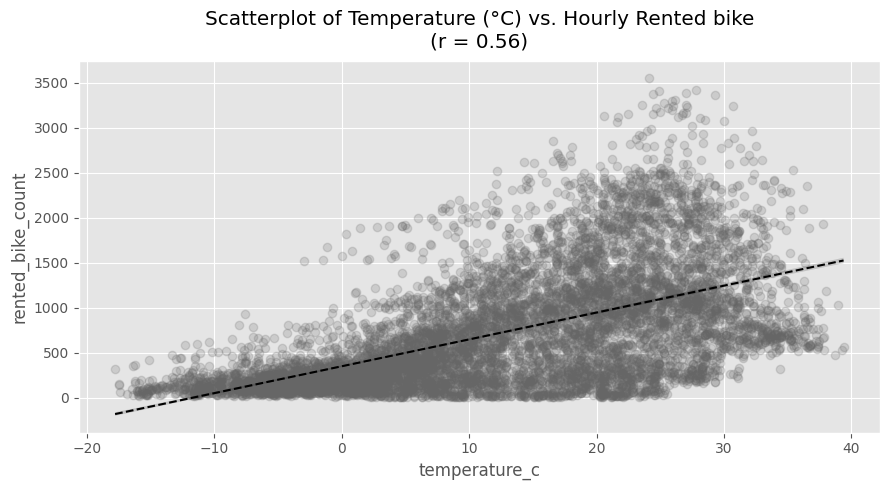

In [39]:
# Plot a scatterplot to show the correlation between temperature and Bikes Renteded
temperature_bike_rent_corr = bike_rent_df['temperature_c'] \
    .corr(bike_rent_df['rented_bike_count'])

plt.figure(figsize=(9, 5))
sns.regplot(x='temperature_c',
            y='rented_bike_count',
            data=bike_rent_df,
            scatter_kws=dict(alpha=0.2, color=my_color[-1]),
            line_kws=dict(color="k", ls='--', lw=1.5))

plt.title(f'Scatterplot of Temperature (°C) vs. Hourly Rented bike\n(r = {temperature_bike_rent_corr:.2f})',
          pad=10)

plt.tight_layout()
plt.show()

Looking at the result for each season, a high number of rents take place during Summer followed by Spring and Autumn.

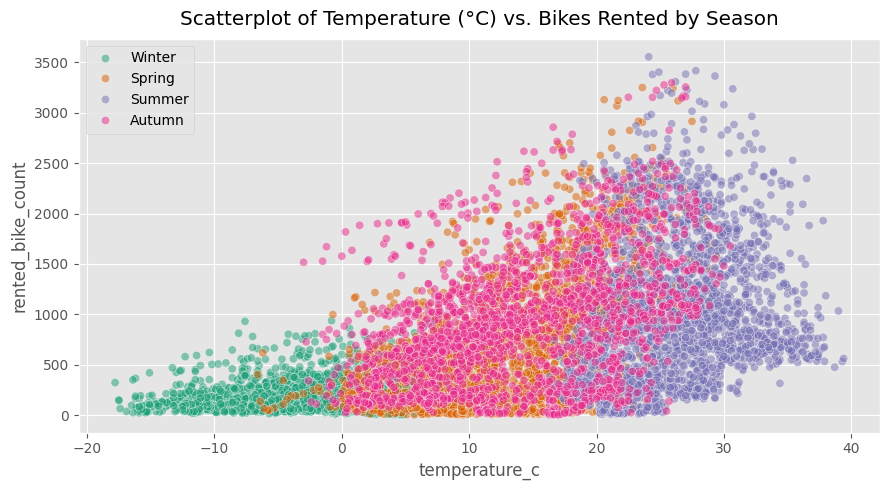

In [40]:
# Plot a scatterplot to show the between temperature and Bikes Renteded for each season
temperature_bike_rent_corr = bike_rent_df['temperature_c'] \
    .corr(bike_rent_df['rented_bike_count'])

plt.figure(figsize=(9, 5))
sns.scatterplot(x='temperature_c',
                y='rented_bike_count',
                data=bike_rent_df,
                hue='seasons',
                alpha=0.5)

plt.title(f'Scatterplot of Temperature (°C) vs. Bikes Rented by Season',
          pad=10)

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

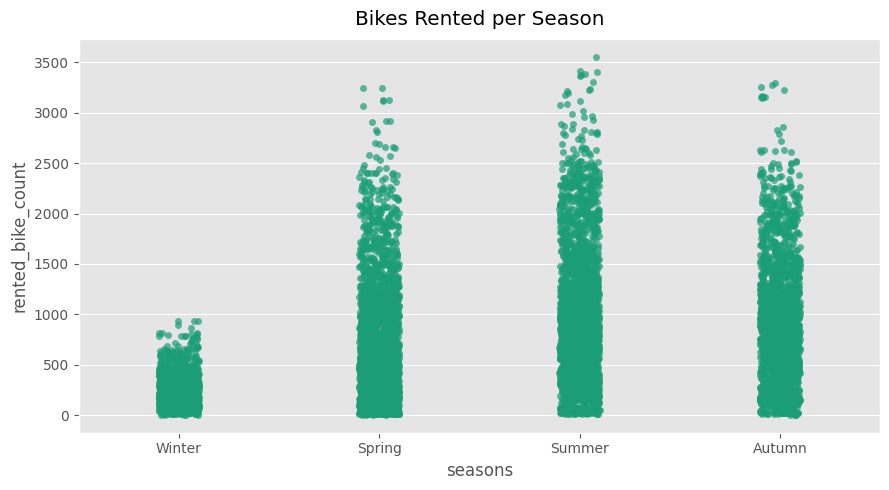

In [41]:
plt.figure(figsize=(9, 5))

sns.stripplot(
    x='seasons',
    y='rented_bike_count',
    data=bike_rent_df,
    alpha=.7,
)

plt.title('Bikes Rented per Season', pad=10)

plt.tight_layout()
plt.show()

In [42]:
# Is rent more than 2500 common?
rent_2500 = bike_rent_df['rented_bike_count'] >= 2500

rent_2500_count = sum(rent_2500)

print(f'Data point with Bikes Rented more than 2500: {rent_2500_count} data points')

Data point with Bikes Rented more than 2500: 97 data points


In [43]:
monthly_rent_df = bike_rent_df[['date', 'rented_bike_count', 'seasons']]
monthly_rent_df['month_year'] = monthly_rent_df['date'].dt.strftime('%b-%y')

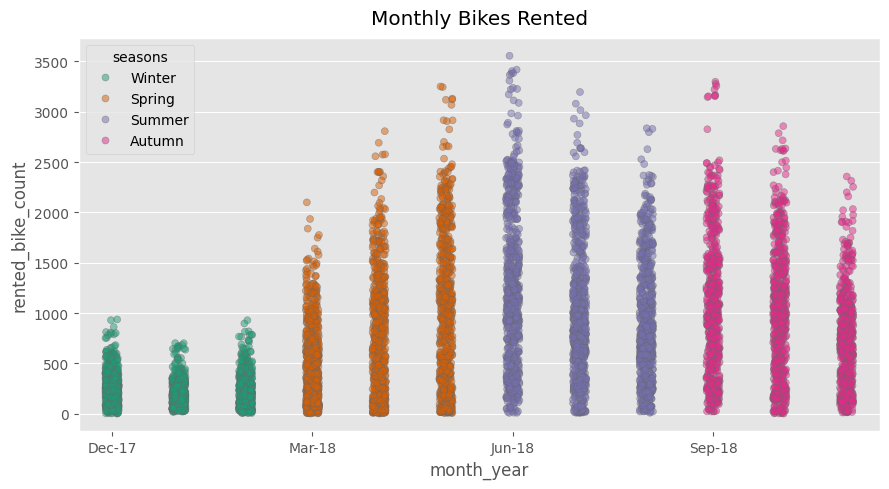

In [44]:
# Plot the monthly bike rent
plt.figure(figsize=(9, 5))

ax = sns.stripplot(
    data=monthly_rent_df,
    x='month_year',
    y='rented_bike_count',
    hue='seasons',
    # jitter=.3,
    edgecolor='dimgray',
    linewidth=.5,
    alpha=.5
)

ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.title('Monthly Bikes Rented', pad=10)

plt.tight_layout()
plt.show()

In [45]:
monthly_rent_df.groupby('seasons', as_index=False)['rented_bike_count'].sum()

seasons  rented_bike_count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

In [46]:
monthly_rent_df.groupby('month_year', as_index=False)['rented_bike_count'].sum()

month_year  rented_bike_count
0      Apr-18             524227
1      Aug-18             651887
2      Dec-17             185330
3      Feb-18             151833
4      Jan-18             150006
5      Jul-18             734460
6      Jun-18             896887
7      Mar-18             380594
8      May-18             707088
9      Nov-18             465715
10     Oct-18             650675
11     Sep-18             673612

Looking at the average number of Bikes Renteded per hour for each season, we can see that there's a trend where the number of Bikes Renteded is high during the afternoon, or from 1 PM to 6 PM when the number of Bikes Renteded could reach more than 3000 bikes per hour.

A higher number of bike rent also occurred in Summer evening, with most hourly rent being more than 1000 bikes per ho and indicated by the higher median, which is around 1600 Bikes Renteded per hourur. This is could be due to the high temperature on the afternoon at this Season, so the users rent the bike later on the day.

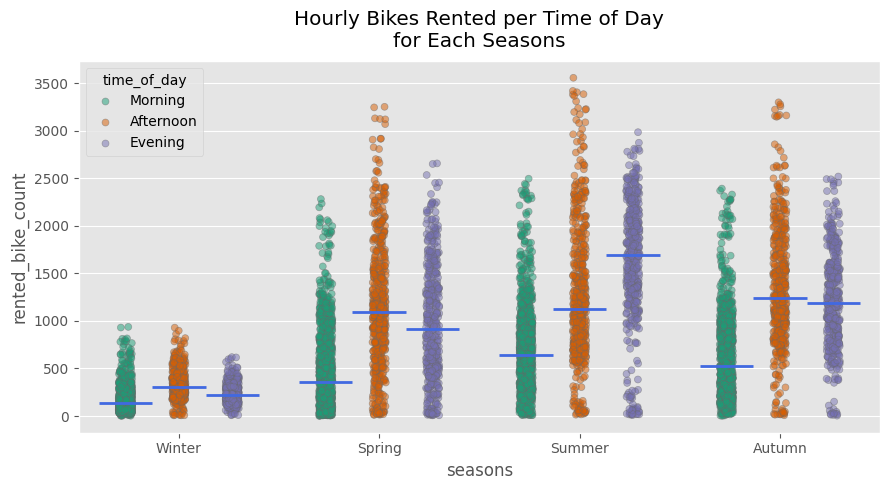

In [47]:
plt.figure(figsize=(9, 5))

sns.stripplot(
    data=bike_rent_df,
    x='seasons',
    y='rented_bike_count',
    hue='time_of_day',
    edgecolor='dimgray',
    linewidth=.5,
    alpha=.5,
    dodge=True
)

sns.boxplot(
    data=bike_rent_df,
    x='seasons',
    y='rented_bike_count',
    hue='time_of_day',
    zorder=3,
    showcaps=False,
    showfliers=None,
    showbox=None,
    whis=0,
    legend=None,
    medianprops=dict(linewidth=2, color='royalblue')
)

plt.title(
    'Hourly Bikes Rented per Time of Day\nfor Each Seasons',
    pad=10
)

plt.tight_layout()
plt.show()

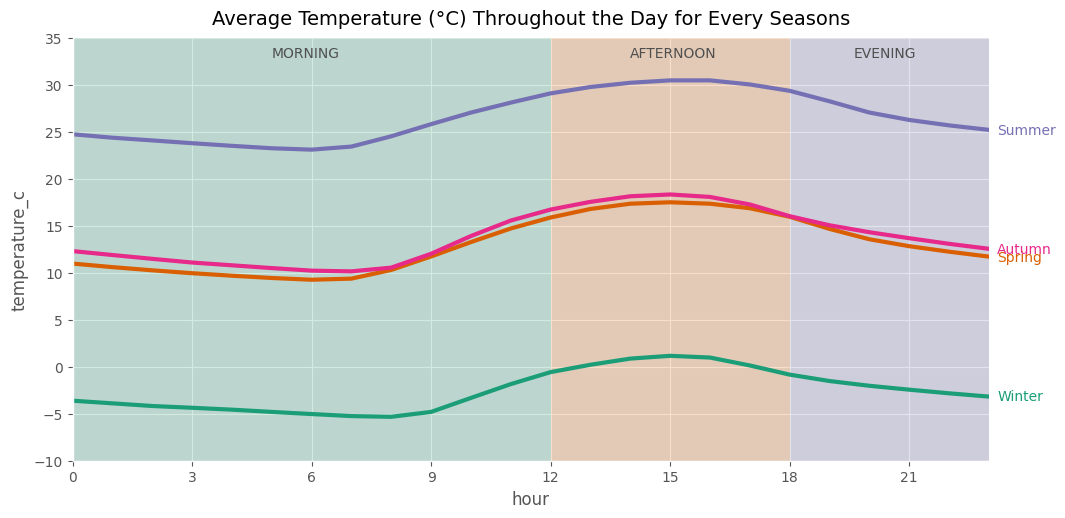

In [48]:
# sns.set(style="white")

g = sns.relplot(
    data=bike_rent_df,
    x='hour',
    y='temperature_c',
    hue='seasons',
    linewidth=3,
    errorbar=None,
    kind='line',
    height=5,
    aspect=2,
    legend=None
    )

g.set(
    xlim=(0, 23),
    ylim=(-10,35)
)

ax = g.axes[0,0]

mid_morning = 5
mid_afternoon = 14
mid_evening = 19.6

ax.text(mid_morning, 33, "MORNING", fontsize=10, color="#4F4F4F")
ax.text(mid_afternoon, 33, "AFTERNOON", fontsize=10, color="#4F4F4F")
ax.text(mid_evening, 33, "EVENING", fontsize=10, color="#4F4F4F")

ax.axvspan(xmin=0, xmax=12, facecolor=my_color[0], alpha=0.2)
ax.axvspan(xmin=12, xmax=18, facecolor=my_color[1], alpha=0.2)
ax.axvspan(xmin=18, xmax=23, facecolor=my_color[2], alpha=0.2)

ax.set_title(
    label="Average Temperature (°C) Throughout the Day for Every Seasons",
    fontsize=14,
    pad=10,
)

labels = bike_rent_df['seasons'].unique()

for line, name in zip(ax.lines, labels):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(),
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=10, va="center")

ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

plt.show()

On the weekday level, there are no big differences in the number of Bikes Renteded on average. One obvious thing is that there are hours on the weekdays that have a high number of Bikes Renteded compared to weekends.

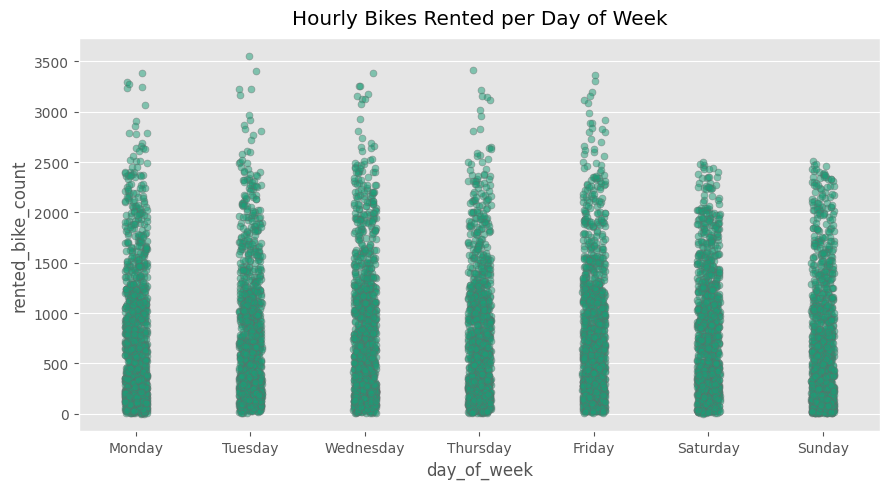

In [49]:
# Plot the bikes rented per day of week

fig, ax = plt.subplots(figsize=(9, 5))

sns.stripplot(
    data=bike_rent_df,
    x='day_of_week',
    y='rented_bike_count',
    edgecolor='dimgray',
    linewidth=.5,
    alpha=.5
)

plt.title('Hourly Bikes Rented per Day of Week', pad=10)

plt.tight_layout()
plt.show()

The number of Bikes Renteded on weekday and weekend can be look at with the following figure. Preventing understock becomes more important during the weekdays because how the demand are varied for each hour, just like what we have discovered before. Meanwhile, 

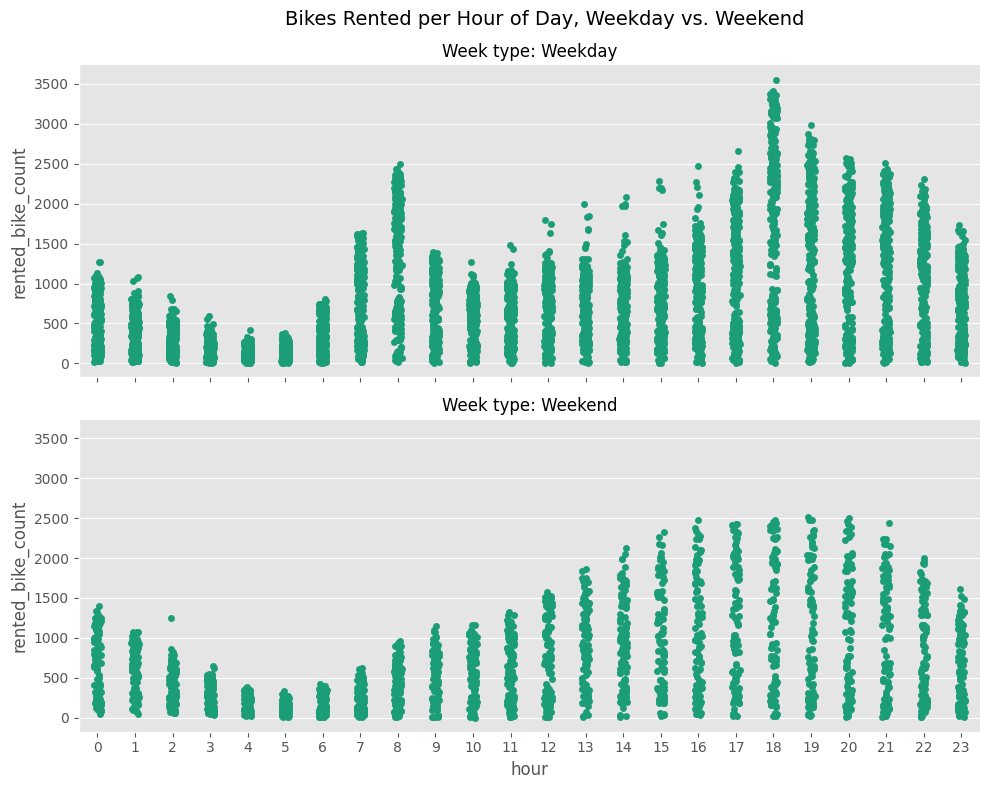

In [50]:
g = sns.catplot(x='hour',
                y='rented_bike_count',
                row='week_type',
                data=bike_rent_df,
                color=my_color[0],
                kind='strip',
                height=4,
                aspect=2.5)

g.fig.suptitle('Bikes Rented per Hour of Day, Weekday vs. Weekend',
               x=0.55,
               fontsize=14)

g.set_titles(row_template="Week type: {row_name}")

plt.tight_layout()
plt.show()

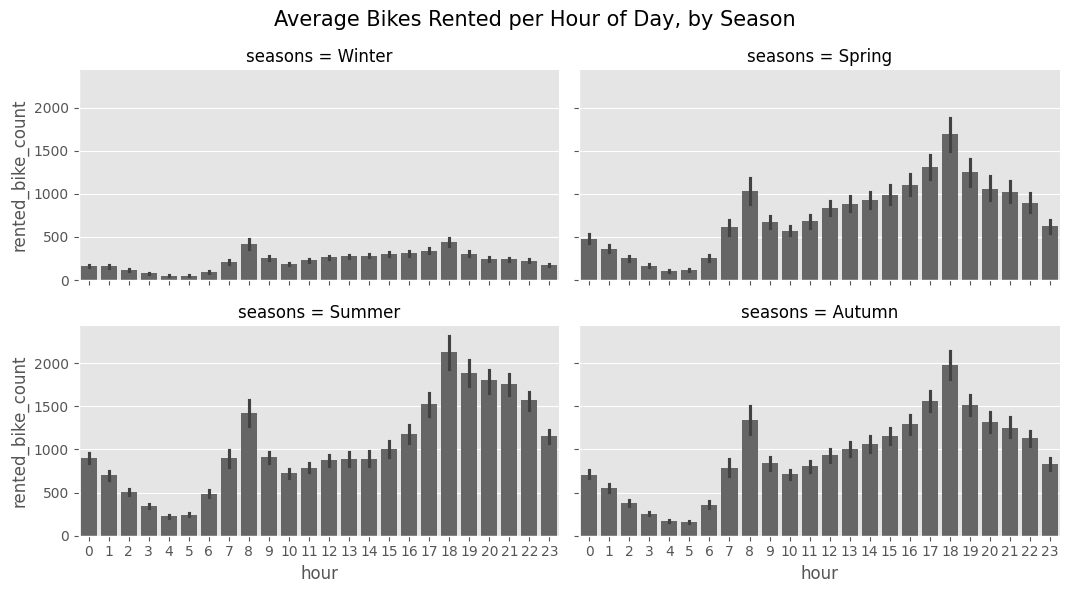

In [51]:
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']

sns.catplot(x='hour',
            y='rented_bike_count',
            data=bike_rent_df,
            col='seasons',
            col_wrap=2,
            color=my_color[-1],
            kind='bar',
            col_order=season_order,
            height=3,
            aspect=1.8)

plt.suptitle(
    'Average Bikes Rented per Hour of Day, by Season',
    fontsize=15)

plt.tight_layout()
plt.show()

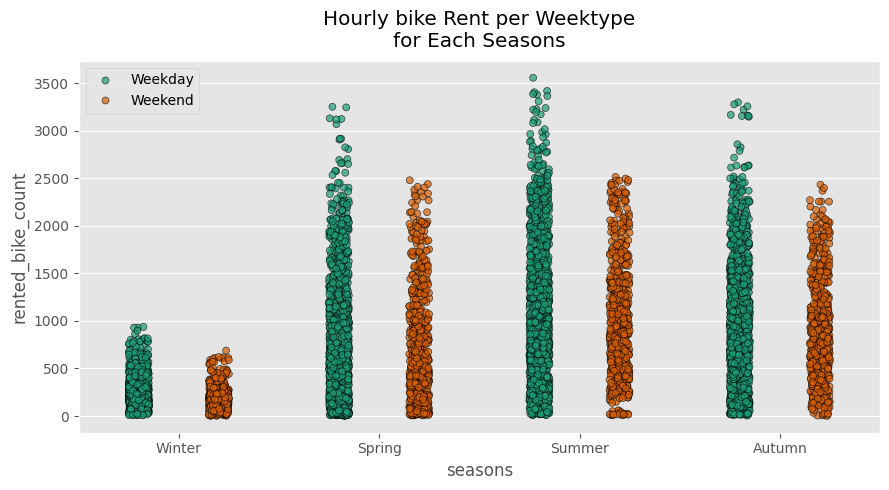

In [52]:
fig, ax = plt.subplots(figsize=(9, 5))

ax = sns.stripplot(
    x='seasons',
    y='rented_bike_count',
    data=bike_rent_df,
    hue='week_type',
    edgecolor='black',
    linewidth=.5,
    alpha=.7,
    dodge=True
)

plt.title(
    'Hourly bike Rent per Weektype\nfor Each Seasons',
    pad=10
)

ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [53]:
holiday_rent_grouped = bike_rent_df.groupby(
    ['is_holiday', 'hour', 'time_of_day'], as_index=False)
holiday_rent = holiday_rent_grouped['rented_bike_count'].mean()

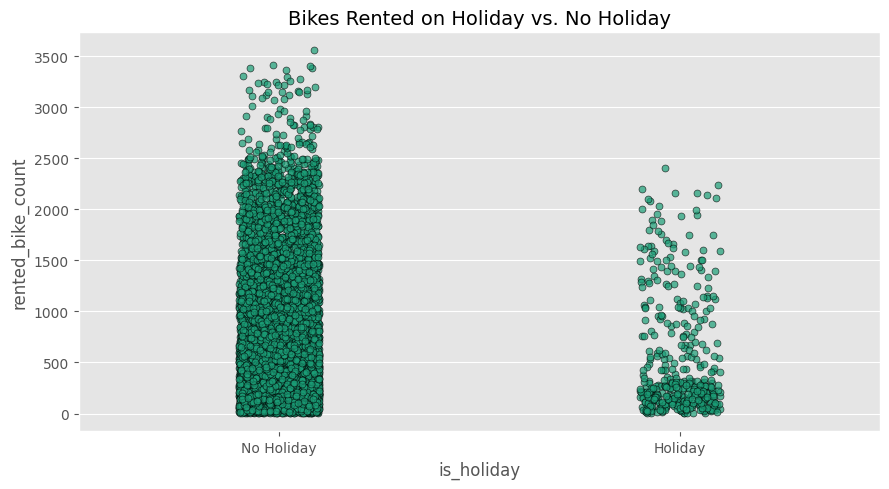

In [54]:
plt.figure(figsize=(9, 5))

sns.stripplot(
    x='is_holiday',
    y='rented_bike_count',
    data=bike_rent_df,
    jitter=.1,
    edgecolor='black',
    linewidth=.5,
    alpha=.7
)

plt.title(
    'Bikes Rented on Holiday vs. No Holiday',
    fontsize=14)

plt.tight_layout()
plt.show()

## Insights

From the analysis we have performed, we can conclude several things:

- Temperature is the variable that correlates the most with the number of Bikes Renteded with Pearson’s R Correlation Coefficient which is 0.56 or 56%, which means that these two variables are moderately correlated.
- A high number of Bikes Rented occurred in Summer with more than 2 million Bikes Renteded this season with June 2018 as the month with the highest number of Bikes Renteded which is almost 900 thousand bikes.
- A high number of rents always happened during rush hour on weekdays, especially around 8 AM and 18 PM.
- Holidays do not affect the number of Bikes Rented.
